<a href="https://colab.research.google.com/github/imran8583/MachineLearning/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn Prediction**

## **Project: Telco Customer Churn**
### **By: Imran Abdul**
### **Date: 6/2/2024**

### **About Dataset**

Analyze all relevant customer data and develop focused customer retention programs.

**The data set includes information about:**

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

### **Libraries**


In [239]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler



### **Dataset**

In [240]:
data = pd.read_csv("/content/Data.csv")

### **EDA**

In [241]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [242]:
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4871,6848-YLDFR,Male,0,Yes,Yes,58,Yes,No,DSL,No,...,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),75.20,4300.8,No
1091,5832-TRLPB,Male,0,No,No,29,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),75.35,2243.9,No
5681,2522-WLNSF,Female,1,Yes,No,34,Yes,No,DSL,No,...,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),64.20,2106.3,No
794,4257-GAESD,Female,0,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,No,Credit card (automatic),45.00,298.7,No
3888,6086-ESGRL,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Credit card (automatic),80.15,80.15,Yes


In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As we can see in The Data TotalCharges Column is Float Datatype but it is showing as Object Datatype.
Let's convert it into numeric data type.

In [244]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [245]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [246]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 null values in TotalCharges. We can drop those null values as it is very minimal quantity.

In [247]:
data[data['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [248]:
data.dropna(inplace=True)

In [249]:
data.shape

(7032, 21)

In [250]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No Missing values in the dataset

In [251]:
data.duplicated().sum()

0

In [252]:
corelation = data.corr(numeric_only=True)

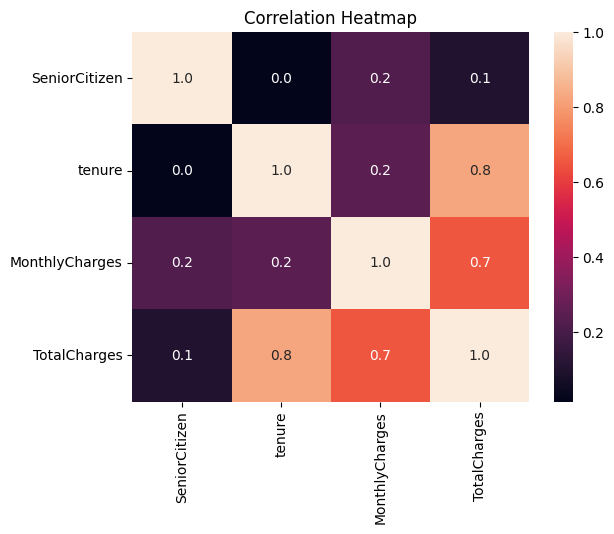

In [253]:
sns.heatmap(corelation, annot=True,  fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

No Duplicate Values

In [254]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

We can drop customerID column as it is no use for the model


In [255]:
data.drop('customerID', axis=1, inplace=True)

In [256]:
data.shape

(7032, 20)

### **Unique Values from all the Obj Columns**

In [257]:
def unique_vals(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            print(f'{col} : {data[col].unique()}')

unique_vals(data)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


### **Let's explore the other colums**

**Gender Column**

In [258]:
gender = data['gender'].value_counts()
gender

gender
Male      3549
Female    3483
Name: count, dtype: int64

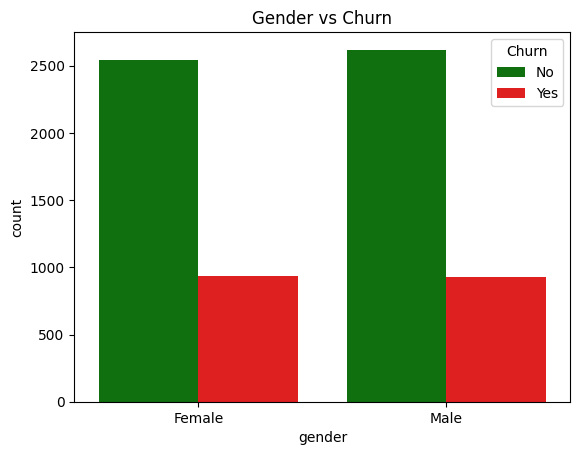

In [259]:
sns.countplot(data, x=data['gender'], hue=data['Churn'], palette={'Yes': 'red', 'No': 'green'})
plt.title('Gender vs Churn')
plt.show()

**Partner**

In [260]:
partner = data['Partner'].value_counts()
partner

Partner
No     3639
Yes    3393
Name: count, dtype: int64

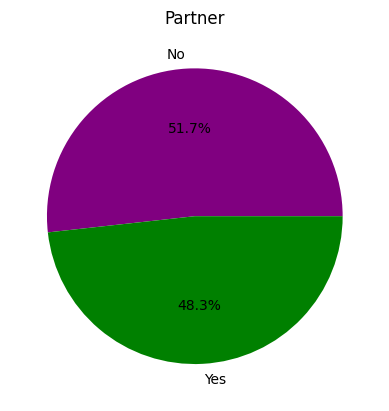

In [261]:
plt.pie(partner, labels=partner.index, colors= ['purple', 'green'], autopct='%1.1f%%')
plt.title('Partner')
plt.show()

**Churn**

In [262]:
churn = data['Churn'].value_counts()
churn

Churn
No     5163
Yes    1869
Name: count, dtype: int64

<ipython-input-263-fd2f949b6b09>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x=data['Churn'], palette={'Yes': 'red', 'No': 'green'})


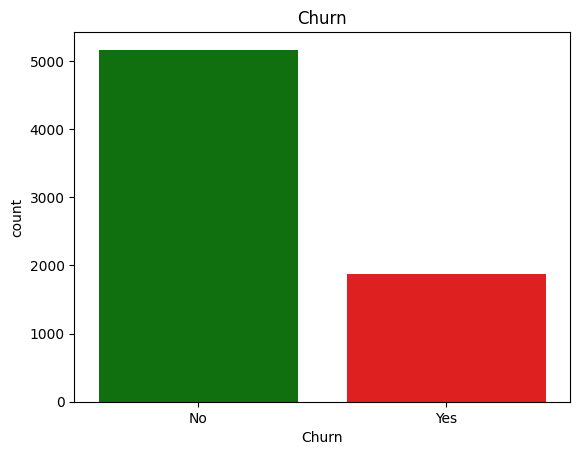

In [263]:
sns.countplot(data, x=data['Churn'], palette={'Yes': 'red', 'No': 'green'})
plt.title('Churn')
plt.show()

**Senior Citizen**

In [264]:
Seniors = data["SeniorCitizen"].value_counts()
Seniors

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

<Axes: xlabel='SeniorCitizen', ylabel='count'>

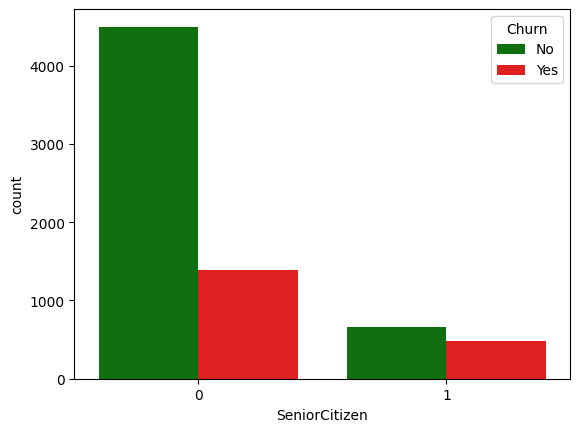

In [265]:
sns.countplot(data, x=data['SeniorCitizen'], hue=data['Churn'], palette={'Yes': 'red', 'No': 'green'})

**Dependents**

In [266]:
dependents  = data['Dependents'].value_counts()
dependents

Dependents
No     4933
Yes    2099
Name: count, dtype: int64

<Axes: xlabel='Dependents', ylabel='count'>

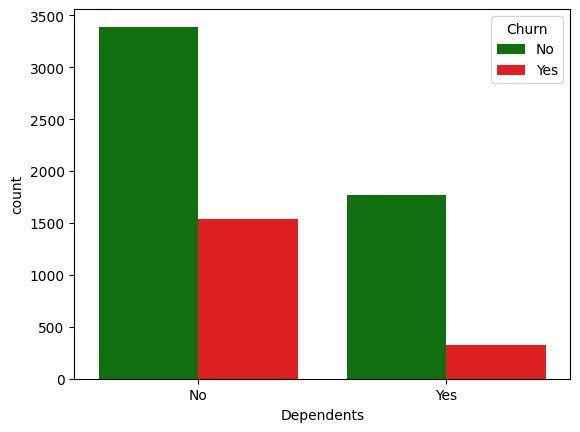

In [267]:
sns.countplot(data, x=data['Dependents'], hue=data['Churn'], palette={'Yes': 'red', 'No': 'green'})

**Phone Service**

In [268]:
PhoneService = data['PhoneService'].value_counts()
PhoneService

PhoneService
Yes    6352
No      680
Name: count, dtype: int64

<ipython-input-269-ed36b93f8fc3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x=data['PhoneService'], palette={'Yes': 'orange', 'No': 'brown'})


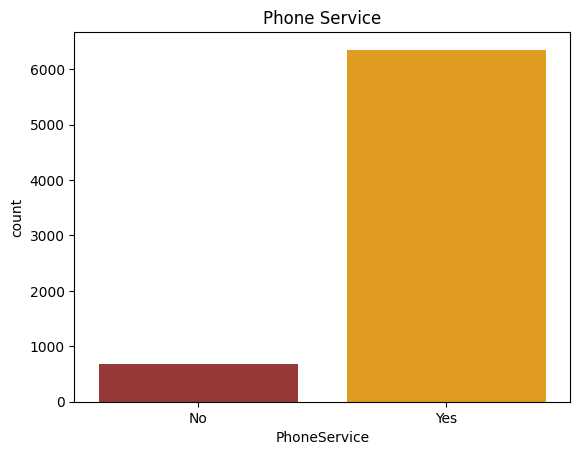

In [269]:
sns.countplot(data, x=data['PhoneService'], palette={'Yes': 'orange', 'No': 'brown'})
plt.title('Phone Service')
plt.show()

**Device Protection**

In [270]:
DeviceProtection = data['DeviceProtection'].value_counts()
DeviceProtection

DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64

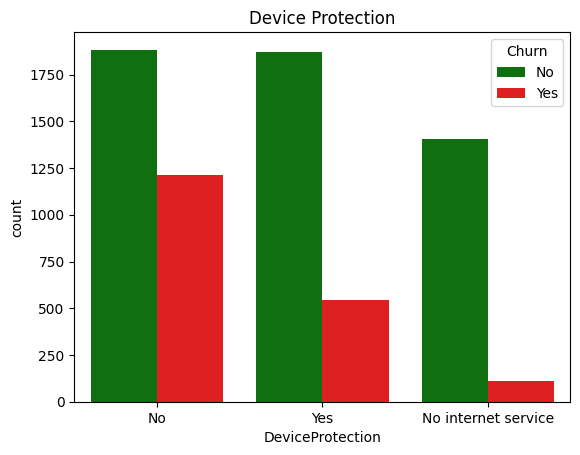

In [271]:
sns.countplot(data, x=data['DeviceProtection'], hue='Churn', palette={ 'Yes': 'red', 'No': 'green'})
plt.title('Device Protection')
plt.show()

**Streaming Movies**

In [272]:
StreamingMovies = data["StreamingMovies"].value_counts()
StreamingMovies

StreamingMovies
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64

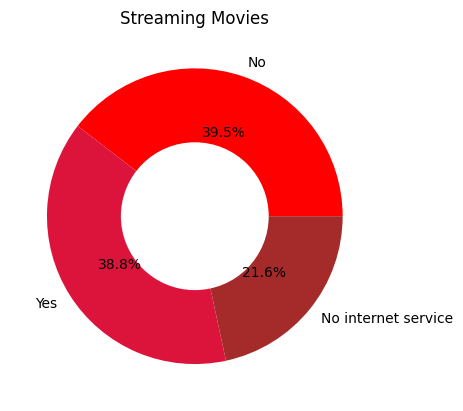

In [273]:
plt.pie(StreamingMovies,  labels=StreamingMovies.index, colors= ["red","crimson","brown"], autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Streaming Movies')
plt.show()

**MultipleLines**

In [274]:
MultipleLines = data['MultipleLines'].value_counts()
MultipleLines

MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

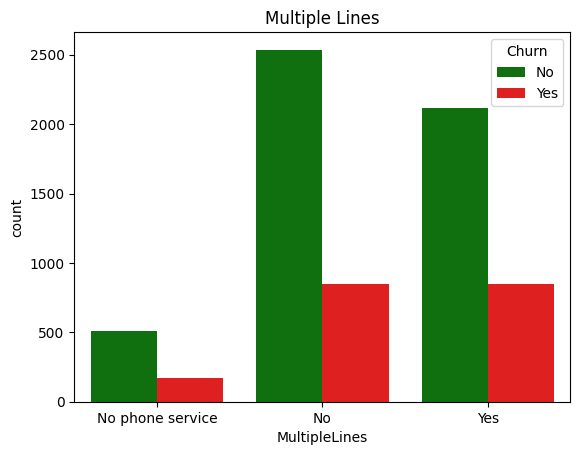

In [275]:
sns.countplot(data, x=data['MultipleLines'], hue="Churn", palette={ 'Yes': 'red', 'No': 'green'})
plt.title('Multiple Lines')
plt.show()

**Internet Service**

In [276]:
InternetService = data['InternetService'].value_counts()
InternetService

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

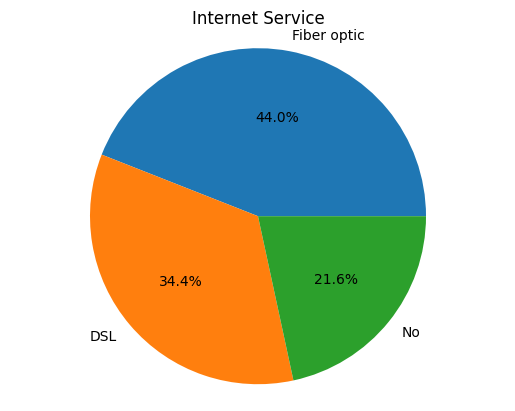

In [277]:
plt.pie(InternetService, labels=InternetService.index, autopct='%1.1f%%')
plt.title( 'Internet Service')
plt.axis('equal')
plt.show()

**Numeric Values**

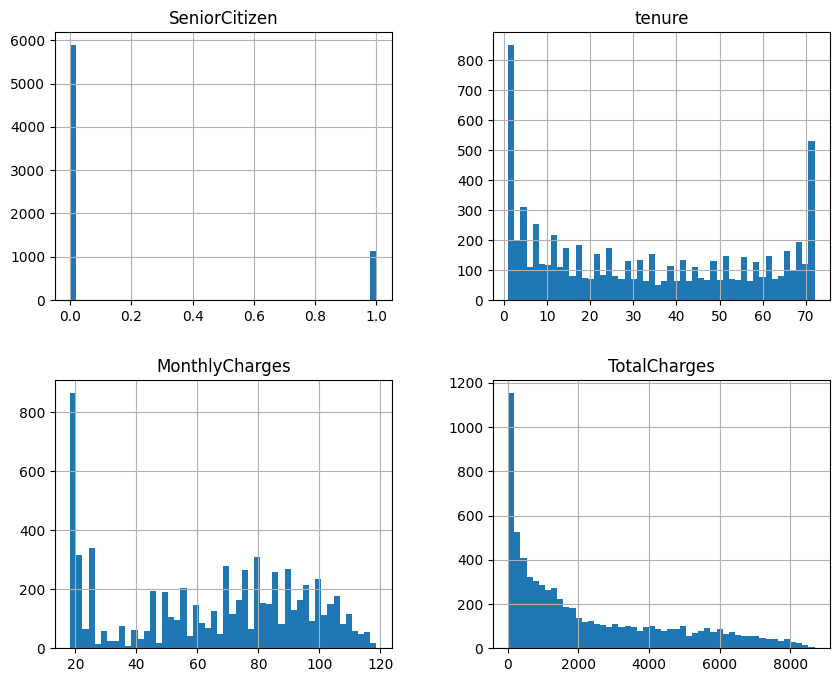

In [278]:
data.hist(bins=50, figsize=(10,8))
plt.show()

##**Feature Engineeering**

In [279]:
unique_vals(data)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


As we can see there are many obj values in our data and can be replaced with numeric values because ML model can perform better with numeric values but befroe that we need to organize the No values in the dataset.

In [280]:
data["OnlineSecurity"] = data["OnlineSecurity"].replace({"No internet service":"No"})

data["OnlineBackup"] = data["OnlineBackup"].replace({"No internet service":"No"})

data["DeviceProtection"] = data["DeviceProtection"].replace({"No internet service":"No"})

data["TechSupport"] = data["TechSupport"].replace({"No internet service":"No"})

data["StreamingTV"]= data["StreamingTV"].replace({"No internet service":"No"})

data["StreamingMovies"] = data["StreamingMovies"].replace({"No internet service":"No"})

data["MultipleLines"] = data["MultipleLines"].replace({"No phone service":"No"})

In [281]:
unique_vals(data)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Now we can replace Obj values with numeric values

In [282]:
data['gender'] = data['gender'].replace({'Male':1,'Female':0})

data['Partner'] = data['Partner'].replace({'Yes':1,'No':0})

data['Dependents'] = data['Dependents'].replace({'Yes':1,'No':0})

data['PhoneService'] = data['PhoneService'].replace({'Yes':1,'No':0})

data['OnlineSecurity'] = data['OnlineSecurity'].replace({'Yes':1,'No':0})

data['OnlineBackup'] = data['OnlineBackup'].replace({'Yes':1,'No':0})

data['DeviceProtection'] = data['DeviceProtection'].replace({'Yes':1,'No':0})

data['TechSupport'] = data['TechSupport'].replace({'Yes':1,'No':0})

data['StreamingTV'] = data['StreamingTV'].replace({'Yes':1,'No':0})

data["PaymentMethod"] = data["PaymentMethod"].replace({"Electronic check": 0, "Mailed check": 1, "Bank transfer (automatic)": 2, "Credit card (automatic)": 3})

data['StreamingMovies'] = data['StreamingMovies'].replace({'Yes':1,'No':0})

data['MultipleLines'] = data['MultipleLines'].replace({'Yes':1,'No':0})

data["InternetService"]=data["InternetService"].replace({"No":0,"Fiber optic":1,"DSL":2})

data["Contract"] = data["Contract"].replace({"One year":0,"Two year":1,"Month-to-month":2})

data['PaperlessBilling'] = data['PaperlessBilling'].replace({'Yes':1,'No':0})


data['Churn'] = data['Churn'].replace({'Yes':1,'No':0})



# We can use LabelEncoder() to convert categorical variables into numerical values.

In [283]:
data.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3210,0,0,1,1,64,1,0,2,1,0,0,1,1,0,0,0,1,65.80,4068.00,0
3682,1,0,0,0,1,1,0,1,0,0,0,0,0,0,2,1,0,69.10,69.10,1
3338,0,0,0,0,12,1,0,1,0,0,1,1,0,1,2,1,0,89.40,1095.65,1
4575,1,0,0,0,4,1,1,0,0,0,0,0,0,0,2,0,1,25.25,101.90,0
3575,1,0,0,0,59,0,0,2,0,0,0,1,1,1,2,1,0,51.70,3005.80,0


## **Data Preprocessing**

In [284]:
col=["tenure","MonthlyCharges","TotalCharges"]

In [285]:
data[col]

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [286]:
scaler = StandardScaler()
data[col]=scaler.fit_transform(data[col])

In [287]:
data[col]

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457
...,...,...,...
7038,-0.343137,0.664868,-0.129180
7039,1.612573,1.276493,2.241056
7040,-0.872808,-1.170004,-0.854514
7041,-1.158016,0.319168,-0.872095


## **Machine Learning Models**

In [288]:
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()

In [289]:
X=data.drop(columns="Churn",axis=1) # features
y=data["Churn"] # label

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [291]:
# print("Training set:", X_train)
# print("Test set:", X_test)

In [292]:
data.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6648,0,0,1,1,-0.506113,1,0,0,0,0,0,0,0,0,2,0,1,-1.487450,-0.828219,0
7019,0,0,0,0,0.268022,1,0,0,0,0,0,0,0,0,1,0,1,-1.484126,-0.642943,0
2068,1,0,0,0,0.593974,1,1,1,1,1,0,1,1,0,2,0,1,1.195053,1.052629,0
588,1,0,1,0,1.612573,1,1,1,1,1,1,0,0,1,1,1,0,1.141869,2.267174,0
4142,0,0,0,0,1.408853,1,0,2,1,1,0,1,0,0,0,0,3,-0.142874,0.700032,0


In [293]:
logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier()

In [294]:
LR_acc = accuracy_score(y_test, logistic_regression.predict(X_test))
DT_acc = accuracy_score(y_test, decision_tree.predict(X_test))
RF_acc = accuracy_score(y_test, random_forest.predict(X_test))
GB_acc = accuracy_score(y_test, gradient_boosting.predict(X_test))

In [295]:
print("Logistic Regression Accuracy:", LR_acc)
print("Decision Tree Accuracy:", DT_acc)
print("Random Forest Accuracy:", RF_acc)
print("Gradient Boosting Accuracy:", GB_acc)

Logistic Regression Accuracy: 0.7860696517412935
Decision Tree Accuracy: 0.7221037668798863
Random Forest Accuracy: 0.7867803837953091
Gradient Boosting Accuracy: 0.7967306325515281


In [296]:
LR_pred= logistic_regression.predict(X_test)
DT_pred= decision_tree.predict(X_test)
RF_pred= random_forest.predict(X_test)
GB_pred= gradient_boosting.predict(X_test)

## **Evaluation**

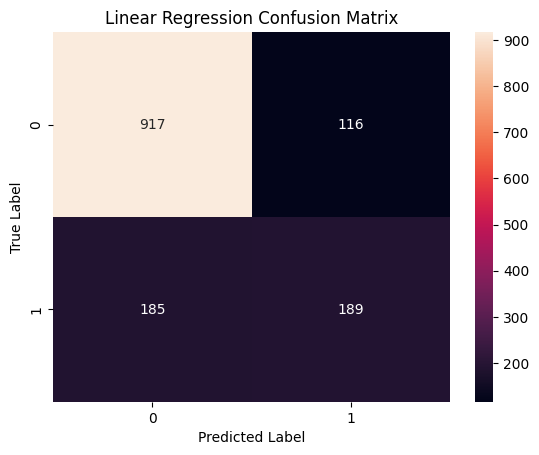

In [297]:
LR_cm = confusion_matrix(y_test,LR_pred) # Confusion Matrix
sns.heatmap(LR_cm,annot=True, fmt="d")
plt.title('Linear Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

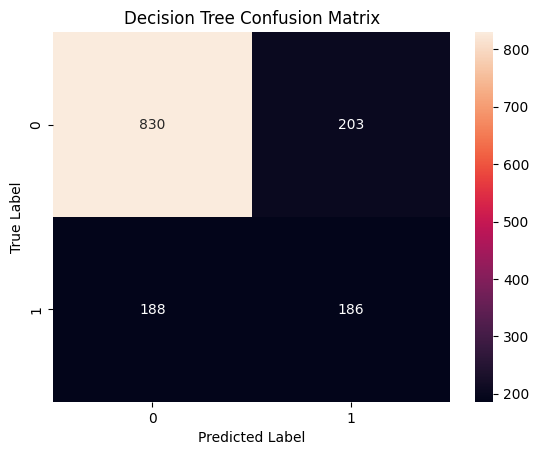

In [298]:
DT_cm = confusion_matrix(y_test,DT_pred) # Confusion Matrix
sns.heatmap(DT_cm,annot=True, fmt="d")
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

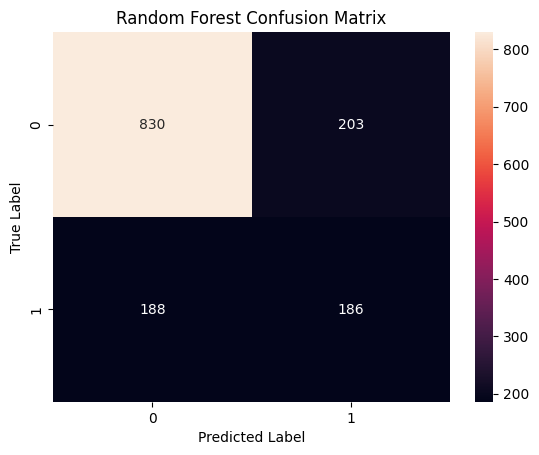

In [299]:
RF_cm = confusion_matrix(y_test,DT_pred) # Confusion Matrix
sns.heatmap(RF_cm,annot=True, fmt="d")
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

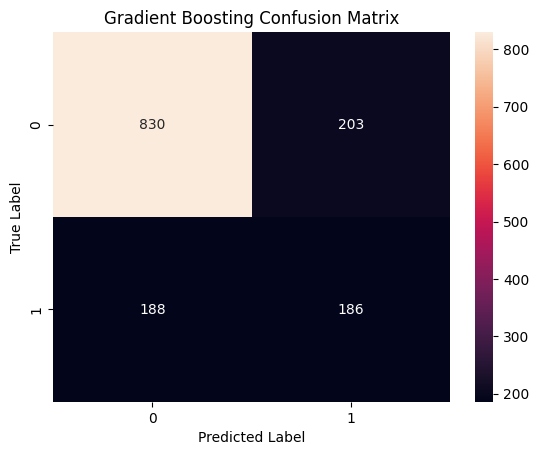

In [300]:
GB_cm = confusion_matrix(y_test,DT_pred) # Confusion Matrix
sns.heatmap(RF_cm,annot=True, fmt="d")
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## **Suggestions**

Encourage customers to opt for paperless billing as it seems to be preferred by a significant portion of customers (4171 out of 7043)

Since a considerable number of customers utilize streaming services like StreamingMovies and StreamingTV, consider investing in enhancing these offerings. Negotiate for better content deals, improve streaming quality, and introduce new features to make the streaming experience more appealing

Since there's a significant number of non-senior citizens, consider tailoring marketing efforts to attract more senior citizens. Identify services or features that are particularly appealing to this demographic and emphasize them in marketing campaigns

While acquiring new customers is important, retaining existing ones is equally crucial. Implement loyalty programs, special discounts for long-term customers, or exclusive offers to incentivize customers to stay with your service.